In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import tensorflow as tf
import pickle, time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

DATADIR = os.getcwd() + "/Accident Images Analysis Dataset/Mydata/"
#add path for dataset here.


CATEGORIES = ["No", "Yes"] # and changed from ["Yes", "No"]
# dataset has to be split into the respective classes and the folders should be named accordingly

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img),0)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\jeffr\\AI/Accident Images Analysis Dataset/Mydata/No'

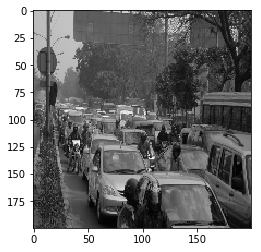

(200, 200)

In [2]:
ss = img_array
ss.shape

IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

ss = new_array
new_array.shape

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████████████████████████████████████████████████████████████████████████| 1094/1094 [00:36<00:00, 29.63it/s]


In [4]:
import random
random.shuffle(training_data)

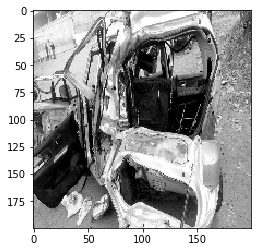

1


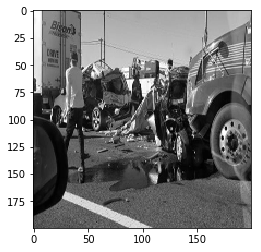

1


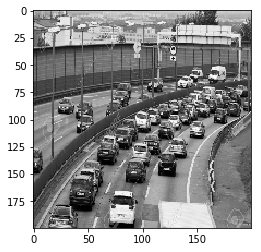

0


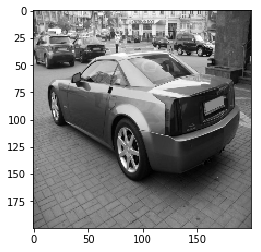

0


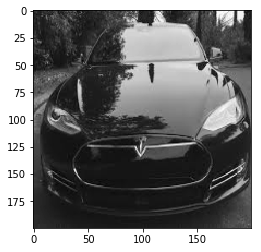

1


In [5]:
# 0 indicates no accident and 1 indicates an accident has occured
for i in range (5):
    new_array = cv2.resize(training_data[i][0], (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')
    plt.show()
    print(training_data[i][1])


In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [7]:
X.shape[0]

2255

In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [9]:
X = np.array(X).reshape(X.shape[0], IMG_SIZE, IMG_SIZE, 1)

In [4]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

In [ ]:
from sklearn.model_selection import train_test_split
X = X/255.0
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [17]:

# model = Sequential()

# model.add(ZeroPadding2D((1, 1), input_shape=X.shape[1:]))
# model.add(Conv2D(16, (3, 3)))
# model.add(Activation("relu"))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(32,(3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(ZeroPadding2D((1, 1)))
# model.add(Conv2D(128, (3,3)))
# model.add(Activation("relu"))
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))
# model.add(Dense(1))
# model.add(Activation("sigmoid"))
# from tensorflow.keras.optimizers import SGD
# sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)


# model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])


# model.fit(X_train,y_train,batch_size=32, epochs = 10, validation_data=(X_test, y_test),verbose=1)


Train on 1804 samples, validate on 451 samples
Epoch 1/10
1804/1804 [==============================] - ETA: 1:48 - loss: 0.6963 - acc: 0.468 - ETA: 1:36 - loss: 0.6955 - acc: 0.484 - ETA: 1:31 - loss: 0.6968 - acc: 0.447 - ETA: 1:28 - loss: 0.6967 - acc: 0.460 - ETA: 1:25 - loss: 0.6961 - acc: 0.456 - ETA: 1:22 - loss: 0.6949 - acc: 0.468 - ETA: 1:20 - loss: 0.6967 - acc: 0.459 - ETA: 1:17 - loss: 0.6935 - acc: 0.484 - ETA: 1:16 - loss: 0.6963 - acc: 0.475 - ETA: 1:14 - loss: 0.6948 - acc: 0.484 - ETA: 1:12 - loss: 0.6941 - acc: 0.491 - ETA: 1:11 - loss: 0.6942 - acc: 0.492 - ETA: 1:09 - loss: 0.6938 - acc: 0.497 - ETA: 1:07 - loss: 0.6945 - acc: 0.493 - ETA: 1:05 - loss: 0.6943 - acc: 0.495 - ETA: 1:04 - loss: 0.6942 - acc: 0.498 - ETA: 1:02 - loss: 0.6940 - acc: 0.501 - ETA: 1:00 - loss: 0.6934 - acc: 0.508 - ETA: 59s - loss: 0.6934 - acc: 0.508 - ETA: 57s - loss: 0.6929 - acc: 0.51 - ETA: 55s - loss: 0.6920 - acc: 0.51 - ETA: 54s - loss: 0.6916 - acc: 0.51 - ETA: 52s - loss: 0.6909 

1804/1804 [==============================] - ETA: 1:23 - loss: 0.6759 - acc: 0.562 - ETA: 1:23 - loss: 0.6594 - acc: 0.578 - ETA: 1:22 - loss: 0.6715 - acc: 0.583 - ETA: 1:21 - loss: 0.6546 - acc: 0.617 - ETA: 1:19 - loss: 0.6423 - acc: 0.643 - ETA: 1:17 - loss: 0.6212 - acc: 0.666 - ETA: 1:16 - loss: 0.6202 - acc: 0.669 - ETA: 1:15 - loss: 0.6228 - acc: 0.671 - ETA: 1:14 - loss: 0.6266 - acc: 0.670 - ETA: 1:12 - loss: 0.6392 - acc: 0.650 - ETA: 1:10 - loss: 0.6425 - acc: 0.642 - ETA: 1:09 - loss: 0.6433 - acc: 0.640 - ETA: 1:07 - loss: 0.6378 - acc: 0.651 - ETA: 1:05 - loss: 0.6376 - acc: 0.654 - ETA: 1:04 - loss: 0.6350 - acc: 0.658 - ETA: 1:02 - loss: 0.6361 - acc: 0.660 - ETA: 1:01 - loss: 0.6355 - acc: 0.658 - ETA: 59s - loss: 0.6364 - acc: 0.656 - ETA: 58s - loss: 0.6355 - acc: 0.65 - ETA: 56s - loss: 0.6359 - acc: 0.65 - ETA: 54s - loss: 0.6374 - acc: 0.65 - ETA: 53s - loss: 0.6361 - acc: 0.64 - ETA: 51s - loss: 0.6332 - acc: 0.65 - ETA: 50s - loss: 0.6320 - acc: 0.65 - ETA: 48s

KeyboardInterrupt: 

In [18]:
# first model 
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=X.shape[1:]))
model.add(Conv2D(16, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train,y_train,batch_size=32, epochs = 10, validation_data=(X_test, y_test),verbose=1)


Train on 1804 samples, validate on 451 samples
Epoch 1/10
1804/1804 [==============================] - ETA: 2:09 - loss: 0.6827 - acc: 0.562 - ETA: 1:49 - loss: 4.1243 - acc: 0.531 - ETA: 1:40 - loss: 3.1544 - acc: 0.541 - ETA: 1:36 - loss: 2.7688 - acc: 0.539 - ETA: 1:32 - loss: 2.3681 - acc: 0.562 - ETA: 1:29 - loss: 2.0921 - acc: 0.552 - ETA: 1:26 - loss: 1.9022 - acc: 0.531 - ETA: 1:24 - loss: 1.7635 - acc: 0.503 - ETA: 1:21 - loss: 1.6440 - acc: 0.506 - ETA: 1:19 - loss: 1.5504 - acc: 0.490 - ETA: 1:17 - loss: 1.4718 - acc: 0.505 - ETA: 1:15 - loss: 1.4069 - acc: 0.505 - ETA: 1:13 - loss: 1.3519 - acc: 0.504 - ETA: 1:11 - loss: 1.3048 - acc: 0.515 - ETA: 1:09 - loss: 1.2640 - acc: 0.516 - ETA: 1:07 - loss: 1.2282 - acc: 0.527 - ETA: 1:05 - loss: 1.1967 - acc: 0.529 - ETA: 1:03 - loss: 1.1687 - acc: 0.527 - ETA: 1:02 - loss: 1.1438 - acc: 0.516 - ETA: 1:00 - loss: 1.1212 - acc: 0.525 - ETA: 58s - loss: 1.1008 - acc: 0.520 - ETA: 57s - loss: 1.0822 - acc: 0.52 - ETA: 55s - loss: 1.0

1804/1804 [==============================] - ETA: 1:41 - loss: 0.0097 - acc: 1.000 - ETA: 1:41 - loss: 0.0550 - acc: 0.968 - ETA: 1:37 - loss: 0.0446 - acc: 0.979 - ETA: 1:37 - loss: 0.0381 - acc: 0.984 - ETA: 1:34 - loss: 0.0333 - acc: 0.987 - ETA: 1:31 - loss: 0.0328 - acc: 0.989 - ETA: 1:28 - loss: 0.0368 - acc: 0.986 - ETA: 1:26 - loss: 0.0399 - acc: 0.984 - ETA: 1:23 - loss: 0.0453 - acc: 0.982 - ETA: 1:21 - loss: 0.0431 - acc: 0.984 - ETA: 1:20 - loss: 0.0405 - acc: 0.985 - ETA: 1:18 - loss: 0.0410 - acc: 0.984 - ETA: 1:16 - loss: 0.0388 - acc: 0.985 - ETA: 1:14 - loss: 0.0368 - acc: 0.986 - ETA: 1:12 - loss: 0.0359 - acc: 0.987 - ETA: 1:10 - loss: 0.0368 - acc: 0.986 - ETA: 1:08 - loss: 0.0353 - acc: 0.987 - ETA: 1:07 - loss: 0.0337 - acc: 0.987 - ETA: 1:05 - loss: 0.0359 - acc: 0.986 - ETA: 1:03 - loss: 0.0354 - acc: 0.987 - ETA: 1:01 - loss: 0.0344 - acc: 0.988 - ETA: 59s - loss: 0.0332 - acc: 0.988 - ETA: 57s - loss: 0.0327 - acc: 0.98 - ETA: 56s - loss: 0.0319 - acc: 0.98 - 

In [19]:
model.save('74%acc')

In [21]:
model = tf.keras.models.load_model('74%acc')

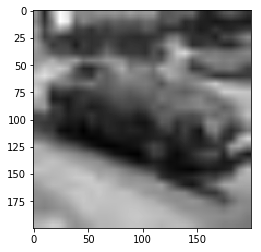

[[1.]]


array([[1.]], dtype=float32)

In [35]:

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

CATEGORIES = ["No", "Yes"]

def prepare(filepath):
    IMG_SIZE = 200
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap='gray')
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



prediction = model.predict([prepare('1789.jpg')])


a = numpy.array(prediction)
print(a)
prediction

In [100]:
prediction

array([[-113.01944]], dtype=float32)

In [64]:
xx = model.layers.pop()
xx

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_18 (ZeroPaddi (None, 202, 202, 1)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 200, 200, 16)      160       
_________________________________________________________________
activation_30 (Activation)   (None, 200, 200, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 100, 16)      0         
_________________________________________________________________
zero_padding2d_19 (ZeroPaddi (None, 102, 102, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 32)      4640      
__________

TypeError: 'Sequential' object does not support indexing

In [80]:
model2 = model.layers[:-1]

In [81]:
model2

In [85]:
xmodel = Sequential()
for layer in model.layers[:-1]: # just exclude last layer from copying
    xmodel.add(layer)

In [1]:
import tensorflow as tf
